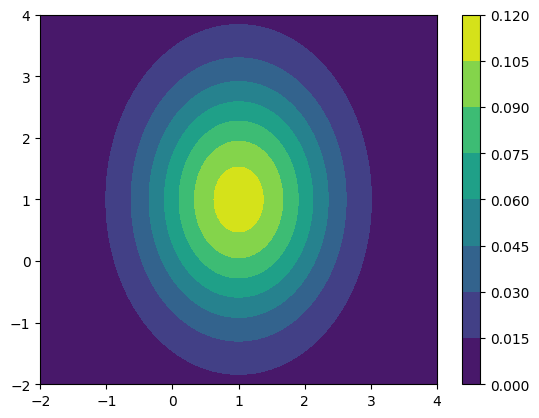

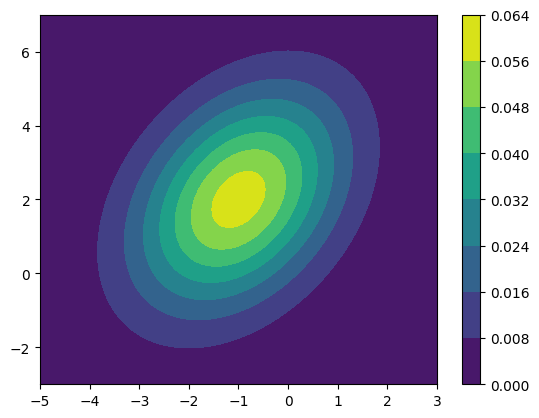

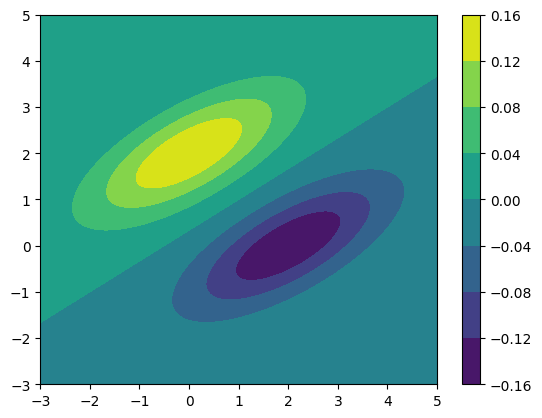

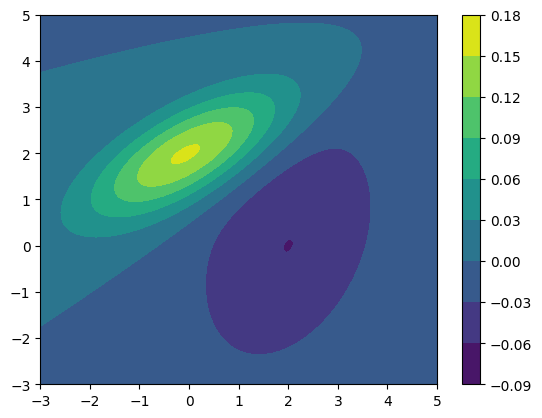

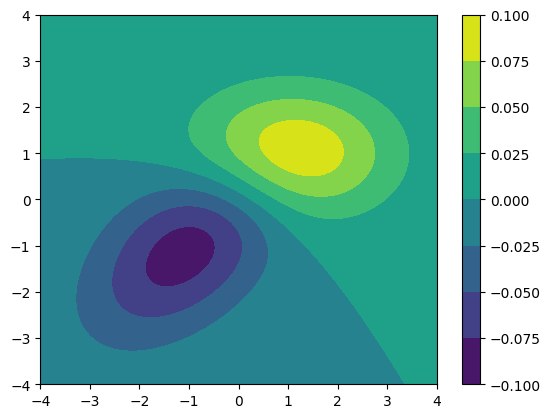

In [344]:
# question 6
import numpy as np 
import scipy.stats
import matplotlib.pyplot as plt

def guass_pdf(M, cov_matrix):
    return scipy.stats.multivariate_normal(M, cov_matrix).pdf

def draw_countour(x_start, x_end, y_start, y_end, pdf):
    X = np.linspace(x_start, x_end, 500)
    Y = np.linspace(y_start, y_end, 500)
    X, Y = np.meshgrid(X, Y)
    points = np.dstack([X, Y])
    plt.contourf(X, Y, pdf(points))
    plt.colorbar()
    plt.show()

#q1
m = [1, 1]
cov = [[1, 0], [0, 2]]

pdf = guass_pdf(m, cov)
draw_countour(-2, 4, -2, 4, pdf)

#q2
m = [-1, 2]
cov = [[2, 1], [1, 4]]
pdf = guass_pdf(m, cov)
draw_countour(-5, 3, -3, 7, pdf)

#q3
m_1 = [0, 2]
m_2 = [2, 0]
cov_1 = [[2, 1], [1, 1]]
pdf_1 = guass_pdf(m_1, cov_1)
pdf_2 = guass_pdf(m_2, cov_1)
draw_countour(-3, 5, -3, 5, lambda a: pdf_1(a) - pdf_2(a))

#q4
m_1 = [0, 2]
m_2 = [2, 0]
cov_1 = [[2, 1], [1, 1]]
cov_2 = [[2, 1], [1, 4]]
pdf_1 = guass_pdf(m_1, cov_1)
pdf_2 = guass_pdf(m_2, cov_2)
draw_countour(-3, 5, -3, 5, lambda a: pdf_1(a) - pdf_2(a))

#q5
m_1 = [1, 1]
m_2 = [-1, -1]
cov_1 = [[2, 0], [0, 1]]
cov_2 = [[2, 1], [1, 2]]
pdf_1 = guass_pdf(m_1, cov_1)
pdf_2 = guass_pdf(m_2, cov_2)
draw_countour(-4, 4, -4, 4, lambda a: pdf_1(a) - pdf_2(a))


sample mean: [3.23824999 5.75751936]

sample covariance: 
[[8.50150318 4.62655915]
 [4.62655915 6.42395033]]

covariance matrix 
 eigenvalues: [12.20446758  2.72098593] 
 eigenvectors: [[ 0.78072745 -0.62487171]
 [ 0.62487171  0.78072745]]


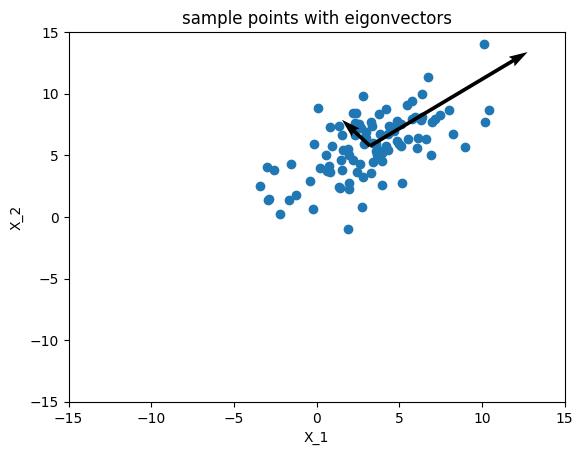

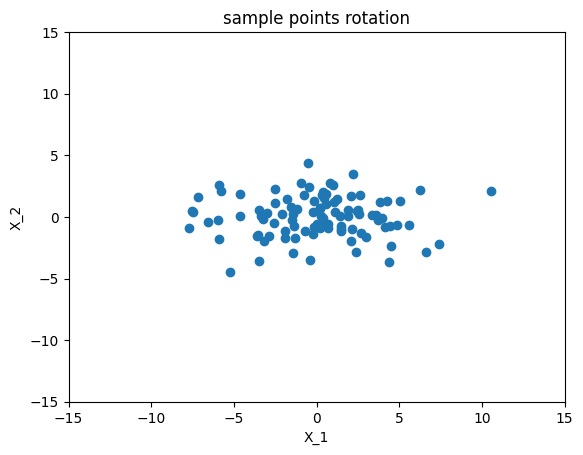

In [345]:
#question 7

#q1
np.random.seed(10)
X_1 = np.random.normal(loc=3, scale=3, size=100)
X_2 = np.random.normal(loc=4, scale=2, size=100) + 0.5 * X_1
mean = np.mean([X_1, X_2], axis=1)
print(f'sample mean: {mean}')

#q2
covariance = np.cov([X_1, X_2])
print(f'\nsample covariance: \n{covariance}')

#q3
eigenvalue, eigenvector = np.linalg.eig(covariance)
print(f'\ncovariance matrix \n eigenvalues: {eigenvalue} \n eigenvectors: {eigenvector}')

#q4
# part i
plt.scatter(X_1, X_2)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('sample points with eigonvectors')

# part ii 
X = [mean[0], mean[0]]  # x-coordinates of starting points
Y = [mean[1], mean[1]]  # y-coordinates of starting points

# Components of vectors
U = [eigenvector[0][0] * eigenvalue[0] , eigenvector[0][1] * eigenvalue[1]]  # x-components of vectors
V = [eigenvector[1][0] * eigenvalue[0] , eigenvector[1][1]  * eigenvalue[1]]  # y-components of vectors

# Create a quiver plot
plt.quiver(X, Y, U, V, angles='xy', scale_units="xy", scale=1)
plt.show()



#q5
center_X_1 = X_1 - mean[0]
center_X_2 = X_2 - mean[1]
x_rotate = np.dot(np.transpose(np.array(eigenvector)), [center_X_1, center_X_2])
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('sample points rotation')
plt.scatter(x_rotate[0], x_rotate[1])
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.show()


In [346]:
#question 8.1

import collections
# .npz fields {training data, training labels, test data}
np.random.seed(100)

# Q3 (a) Data Partitioning and shuffle
def partition(data, validation_size):
    """
    Partition the input training data and labels into training and validation sets.

    Parameters:
    - data (dict): A dictionary containing keys "training_data" and "training_labels".
    - validation_size (int): The size of the validation set (number of samples).

    Returns:
    list: a list 
        - "train_data": The training data array after shuffling.
        - "train_labels": The corresponding training labels after shuffling.
        - "validate_data": The validation data array after shuffling.
        - "validate_labels": The corresponding validation labels after shuffling.

    """
    # Seed the random number generator for reproducibility

    # Get the training data and labels from the input dictionary
    sample_data = data["training_data"]
    sample_label = data["training_labels"]
    sample_size = data["training_data"].shape[0]

    # Shuffle the indices using random permutation
    index_shuffled = np.random.permutation(sample_size)

    #fancy indices
    # Split the data and labels into training and validation sets based on the specified size
    train_data = sample_data[index_shuffled[validation_size:]]
    train_labels = sample_label[index_shuffled[validation_size:]]

    validate_data = sample_data[index_shuffled[:validation_size]]
    validate_labels = sample_label[index_shuffled[:validation_size]]

    # Return a list containing the shuffled training and validation data and labels
    return [train_data, train_labels, validate_data, validate_labels]

# partition mnist data
mnist = np.load('../data/mnist-data-hw3.npz')
mnist_train_data, mnist_train_labels, mnist_validate_data, mnist_validate_label = partition(mnist, 10000)
mnist_train_data = mnist_train_data.reshape(-1, 28 * 28)
mnist_validate_data = mnist_validate_data.reshape(-1, 28 * 28)
mnist_train_data = scipy.cluster.vq.whiten(mnist_train_data)

# partition spam data
spam = np.load('../data/spam-data-hw3.npz')
spam_train_data, spam_train_labels, spam_validate_data, spam_validate_label = partition(spam, int(spam["training_data"].shape[0] * 0.2))
spam_train_data = scipy.cluster.vq.whiten(spam_train_data)


# fit gaussian 
# caculate the covariance and mean of the sample points of each feature 
# a list of [mean, cov] for each matrix 

# get a array by class
mnist_feature = {c: [] for c in np.unique(mnist_train_labels)}
spam_feature = {c: [] for c in np.unique(spam_train_labels)}


# classify data to each class
for i, c in enumerate(mnist_train_labels):
    mnist_feature[c].append(np.array(mnist_train_data[i]))

for i, c in enumerate(spam_train_labels):
    spam_feature[c].append(np.array(spam_train_data[i]))

# calculate the covariance matrix and mean for each class
mnist_likelihood_estimator = {}
spam_likelihood_estimator = {}
for c in mnist_feature:
    cov = np.cov(mnist_feature[c], rowvar=False)
    mean = np.mean(mnist_feature[c], axis=0)
    mnist_likelihood_estimator[c] = (mean, cov)

for c in spam_feature:
    cov = np.cov(spam_feature[c], rowvar=False)
    mean = np.mean(spam_feature[c], axis=0)
    spam_likelihood_estimator[c] = (mean, cov)



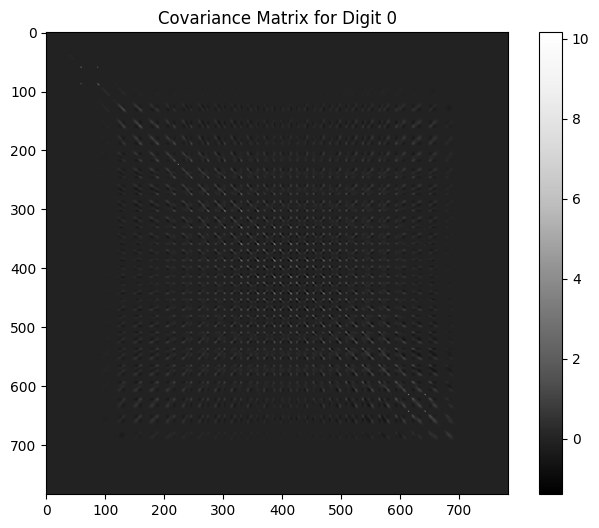

In [347]:
#question 8.2
import matplotlib.pyplot as plt

#visialize 0 in mnist
covariance_matrix_0 = mnist_likelihood_estimator[0][1]

# Visualize the covariance matrix
plt.figure(figsize=(8, 6))
plt.imshow(covariance_matrix_0, cmap='Greys_r')
plt.colorbar()
plt.title('Covariance Matrix for Digit 0')
plt.show()

lda error rate: [0.36, 0.273, 0.242, 0.213, 0.191, 0.184, 0.175, 0.17, 0.17]


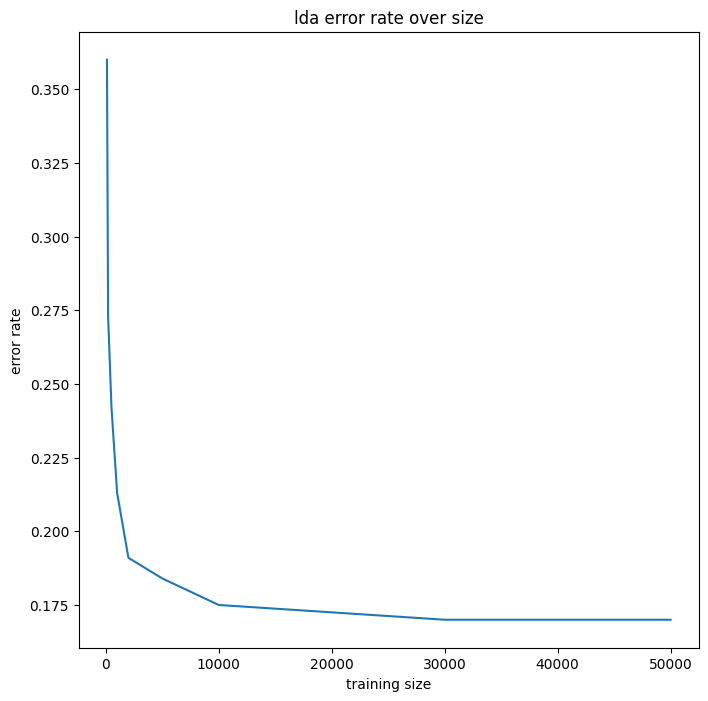

qda error rate: [0.421, 0.312, 0.227, 0.123, 0.095, 0.112, 0.135, 0.153, 0.147]


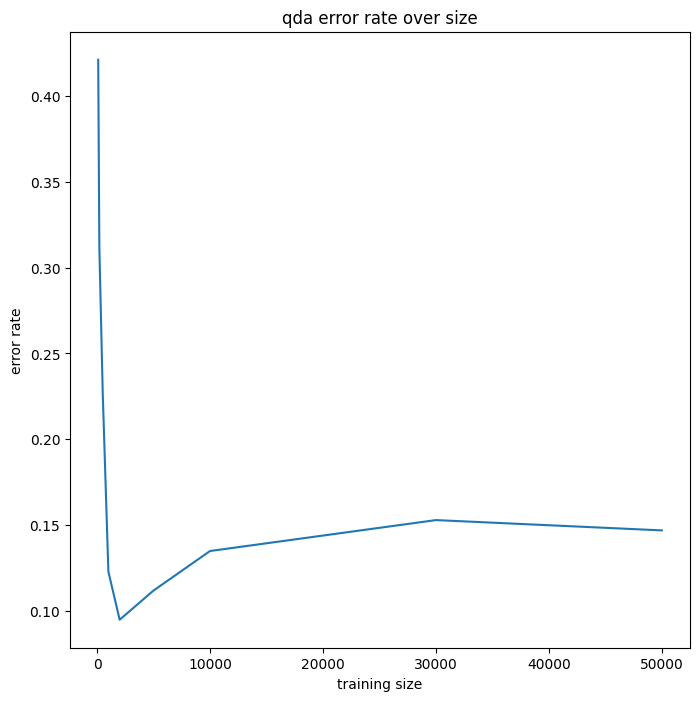

In [348]:
#question 8.3
import math
train_size = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]

def lda(size):
    data = mnist_train_data[:size]
    labels = mnist_train_labels[:size]

    feature_class = collections.defaultdict(list)
    for i, c in enumerate(labels):
        feature_class[c].append(data[i])


    #{class: [prior probrobility, mean, pdf]}
    feature_param = {}
    avg_cov = 0
    for c in feature_class:
        mean = np.mean(feature_class[c], axis=0)
        prior = len(feature_class[c]) / size
        feature_param[c] = [prior, mean]
        
        avg_cov = np.add(np.dot((feature_class[c] - mean).T, (feature_class[c] - mean)), avg_cov)
        
    avg_cov = avg_cov / size
    epsilon=0.1
    avg_cov = np.add(np.eye(784) * epsilon, avg_cov)
    
    for c in feature_class:
        feature_param[c].append(scipy.stats.multivariate_normal(mean=feature_param[c][1], cov=avg_cov, allow_singular=False))
  
    return feature_param

def qda(size, t):
    data, labels = None, None
    if t == 'mnist':
        data = mnist_train_data[:size]
        labels = mnist_train_labels[:size]
    else:
        data = spam_train_data[:size]
        labels = spam_train_labels[:size]

    feature_class = collections.defaultdict(list)
    for i, c in enumerate(labels):
        feature_class[c].append(data[i])


    #{class: [prior probrobility, mean, cov, pdf]}
    feature_param = {}
    epsilon=0.01
    for c in feature_class:
        mean = np.mean(feature_class[c], axis=0)
        prior = len(feature_class[c]) / size
        cov = np.add(np.eye(mean.shape[0]) * epsilon, np.dot((feature_class[c] - mean).T, (feature_class[c] - mean)) / len(feature_class[c]))
        pdf = scipy.stats.multivariate_normal(mean=mean, cov=cov, allow_singular=False)

        feature_param[c] = [prior, mean, cov, pdf]

    return feature_param

def predict_lda_accuracy(size):
    
    feature_param = lda(size)
    correct_count = 0

    
    for i, d in enumerate(mnist_validate_data):
        max_prob = -math.inf
        max_class = -1

        for c in feature_param:
            pdf = feature_param[c][2]
            p = pdf.logpdf(d) + math.log(feature_param[c][0])
            if p > max_prob:
                max_prob = p
                max_class = c
        if max_class == mnist_validate_label[i]:
            correct_count += 1
        
    return correct_count / mnist_validate_data.shape[0]

def predict_qda_accuracy(size):
    feature_param = qda(size, 'mnist')
    correct_count = 0
    for i, d in enumerate(mnist_validate_data):
        max_prob = -math.inf
        max_class = -1
        for c in feature_param:
            m = feature_param[c][1]
            cov = feature_param[c][2]
            pdf = feature_param[c][3]
            p = pdf.logpdf(d) + math.log(feature_param[c][0])
            if p > max_prob:
                max_prob = p
                max_class = c
        if max_class == mnist_validate_label[i]:
            correct_count += 1  
    return correct_count / mnist_validate_data.shape[0]
lda_err = []
qda_err = []

for size in train_size:
    lda_err.append(round(1 - predict_lda_accuracy(size), 3))
    qda_err.append(round(1 - predict_qda_accuracy(size), 3))

# 8.3 (a), (b)
print(f"lda error rate: {lda_err}")

plt.figure(figsize=(8, 8))
plt.plot(train_size, lda_err)
plt.title('lda error rate over size')
plt.xlabel('training size')
plt.ylabel('error rate')
plt.show()

print(f"qda error rate: {qda_err}")
plt.figure(figsize=(8, 8))
plt.plot(train_size, qda_err)
plt.title('qda error rate over size')
plt.xlabel('training size')
plt.ylabel('error rate')
plt.show()

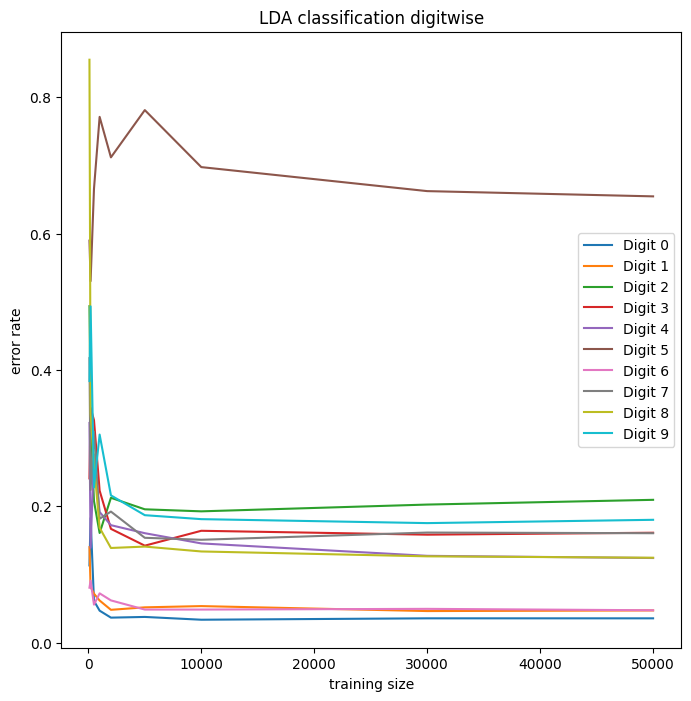

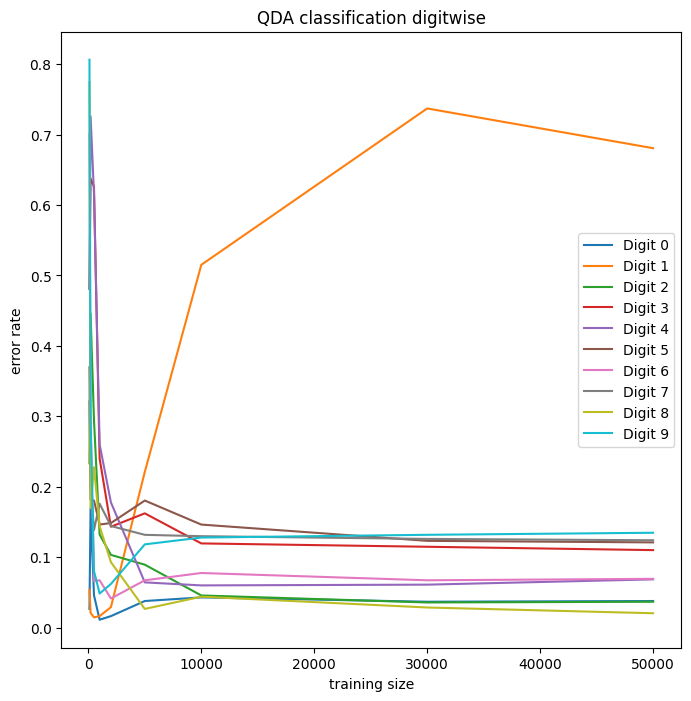

In [349]:
# 8.3 (d)
def lda_errate_by_class(size):
    
    feature_param = lda(size)

    digit_lda_error_rate = np.zeros(10)
    digit_total_rate = np.zeros(10)
    for i, d in enumerate(mnist_validate_data):
        max_prob = -math.inf
        max_class = -1
        for c in feature_param:
            
            pdf = feature_param[c][2]
            p = pdf.logpdf(d) + math.log(feature_param[c][0])
            if p > max_prob:
                max_prob = p
                max_class = c
        digit_total_rate[mnist_validate_label[i]] += 1
        
        if max_class == mnist_validate_label[i]:
            digit_lda_error_rate[mnist_validate_label[i]] += 1

        
    return 1 - digit_lda_error_rate / digit_total_rate

def qda_errate_by_class(size):
    
    feature_param = qda(size, 'mnist')

    digit_qda_error_rate = np.zeros(10)
    digit_total_rate = np.zeros(10)

    for i, d in enumerate(mnist_validate_data):
        max_prob = -math.inf
        max_class = -1
        for c in feature_param:
            m = feature_param[c][1]
            cov = feature_param[c][2]
            pdf = feature_param[c][3]
            p = pdf.logpdf(d) + math.log(feature_param[c][0])
            if p > max_prob:
                max_prob = p
                max_class = c

        digit_total_rate[mnist_validate_label[i]] += 1
        if max_class == mnist_validate_label[i]:
            digit_qda_error_rate[mnist_validate_label[i]] += 1

    return 1 - digit_qda_error_rate / digit_total_rate

lda_err_by_size = []
for size in train_size:
    lda_err_by_size.append(lda_errate_by_class(size))

plt.figure(figsize=(8, 8))
lda_err_by_size = np.array(lda_err_by_size).T
for i, l in enumerate(lda_err_by_size):
    plt.plot(train_size, l, label=f"Digit {i}")
plt.title('LDA classification digitwise')
plt.xlabel('training size')
plt.ylabel('error rate')
plt.legend()
plt.show()
    

qda_err_by_size = []
for size in train_size:
    qda_err_by_size.append(qda_errate_by_class(size))


plt.figure(figsize=(8, 8))
qda_err_by_size = np.array(qda_err_by_size).T
for i, l in enumerate(qda_err_by_size):
    plt.plot(train_size, l, label=f"Digit {i}")
plt.title('QDA classification digitwise')
plt.xlabel('training size')
plt.ylabel('error rate')
plt.legend()
plt.show()


In [350]:
# Q5 Kaggle

import os
import csv

# generate cvs for mnist
mnist_test_data = mnist["test_data"].reshape(-1, 28 * 28)

feature_param = qda(10000, 'mnist')
data = []
for i, d in enumerate(mnist_test_data):
    max_prob = -math.inf
    max_class = -1
    for c in feature_param:
        m = feature_param[c][1]
        cov = feature_param[c][2]
        pdf = feature_param[c][3]
        p = pdf.logpdf(d) + math.log(feature_param[c][0])
    
        if p > max_prob:
            max_prob = p
            max_class = c

    data.append({"Id": i+1, "Category": max_class})


csv_file_path = os.path.join(os.path.split(os.getcwd())[0], "mnist_kaggle.csv")

fields = ["Id", "Category"]

# Writing to CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fields)

    # Write the header
    writer.writeheader()

    # Write the data
    writer.writerows(data)

# generate cvs for spam 
spam_test_data = spam["test_data"]

feature_param = qda(spam_test_data.shape[0], 'spam')
data = []
for i, d in enumerate(spam_test_data):
    max_prob = -math.inf
    max_class = -1
    for c in feature_param:
        m = feature_param[c][1]
        cov = feature_param[c][2]
        pdf = feature_param[c][3]
        p = pdf.logpdf(d) + math.log(feature_param[c][0])
    
        if p > max_prob:
            max_prob = p
            max_class = c

    data.append({"Id": i+1, "Category": max_class})


csv_file_path = os.path.join(os.path.split(os.getcwd())[0], "spam_kaggle.csv")

fields = ["Id", "Category"]

# Writing to CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fields)

    # Write the header
    writer.writeheader()

    # Write the data
    writer.writerows(data)